In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from mlflood.dataset import load_dataset, rain_const, waterdepth_diff_const
import numpy as np
from mlflood.conf import rain_const

In [3]:
# parameter for the catchment
border_size = 0
catchment_kwargs = {}
catchment_kwargs["tau"]=0.5
catchment_kwargs["timestep"]=1
catchment_kwargs["sample_type"]="full"
catchment_kwargs["dim_patch"]=120
catchment_kwargs["fix_indexes"]=False
catchment_kwargs["border_size"] = border_size

# toy

#### Physical constant
every cell has the same area
total amount of water = area * mean(wd) = cumulated(rainfall) * area
mean(wd) = cumulated(rainfall) 

wd_data = c_wd * wd
rainfall_data = c_rainfall * rainfall
my_const = c_wd / c_rainfall

mean(wd_data) = cumulated(rainfall_data) * my_const

In [ ]:
catchment_num = "toy"
train_dataset, valid_dataset = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 3

In [ ]:
my_const = rain_const * np.sum(train_dataset.dem_mask.numpy())

In [ ]:
rf = train_dataset.rainfall_events[i] * my_const
mean_WD = [np.sum(train_dataset.waterdepth[0][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]

# my_const = max(rf)/max(mean_WD)
# rf = rf * my_const
# rf = rf/max(rf)
# mean_WD = mean_WD/max(mean_WD)
diff_WD = np.diff(np.array(mean_WD))



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('toy', fontsize=16)

ax1.plot(rf, label="rain")
ax1.plot(mean_WD, label="water depth")
ax1.axis(xmin=0,xmax=35)
ax1.legend()

ax2.plot(rf, label="rain")
ax2.plot(diff_WD, label="water depth derivative")
ax2.axis(xmin=0,xmax=15)
ax2.legend()

rf = np.cumsum(train_dataset.rainfall_events[i]) * my_const
tw = [np.sum(train_dataset.waterdepth[i][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]
# rf = rf/rf[-1]
# tw = tw/tw[-1]
ax3.plot(rf, label="cumulated amount of rain")
ax3.plot(tw, label="water depth")
ax3.axis(xmin=0,xmax=40)
ax3.legend()

# 709

In [4]:
catchment_num = "709"
train_dataset, valid_dataset = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 0

Load file: /scratch/tdonauer/tabea_mt/data/generated_datasets/709-train.h5
Load file: /scratch/tdonauer/tabea_mt/data/generated_datasets/709-val.h5


In [5]:
my_const = rain_const * np.sum(train_dataset.dem_mask.numpy()) #/ 12 * np.sum(train_dataset.dem_mask.numpy()) / 1000

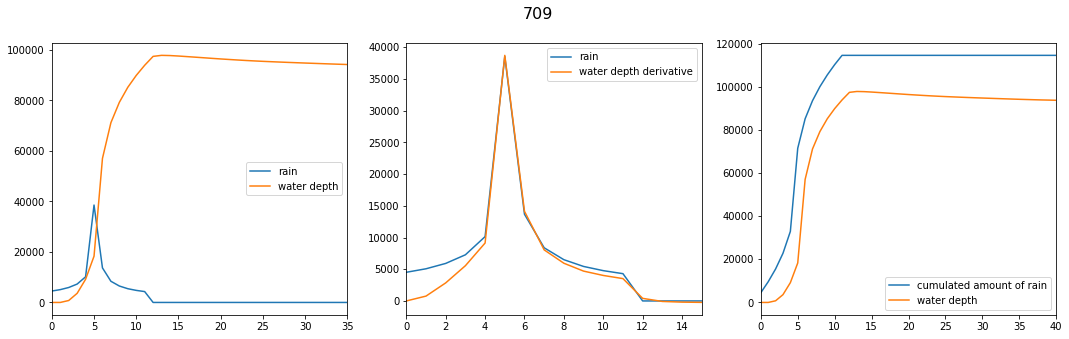

In [6]:
rf = train_dataset.rainfall_events[i] * my_const
mean_WD = [np.sum(train_dataset.waterdepth[i][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[i]))]
# rf = rf/max(rf)
# mean_WD = mean_WD/max(mean_WD)
diff_WD = np.diff(np.array(mean_WD))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('709', fontsize=16)

ax1.plot(rf, label="rain")
ax1.plot(mean_WD, label="water depth")
ax1.axis(xmin=0,xmax=35)
ax1.legend()

ax2.plot(rf, label="rain")
ax2.plot(diff_WD, label="water depth derivative")
ax2.axis(xmin=0,xmax=15)
ax2.legend()

rf = np.cumsum(train_dataset.rainfall_events[i]) * my_const
tw = [np.sum(train_dataset.waterdepth[i][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[i]))]
# rf = rf/rf[-1]
# tw = tw/tw[-1]
ax3.plot(rf, label="cumulated amount of rain")
ax3.plot(tw, label="water depth")
ax3.axis(xmin=0,xmax=40)
ax3.legend()

**709_new is the same as 709**

# 684

In [ ]:
catchment_num = "684"
train_dataset, _ = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 0

In [ ]:
rf = train_dataset.rainfall_events[i]/12
mean_WD = [np.mean(train_dataset.waterdepth[0][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]
rf = rf/max(rf)
mean_WD = mean_WD/max(mean_WD)
diff_WD = np.diff(np.array(mean_WD))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
fig.suptitle('684', fontsize=16)

ax1.plot(rf, label="rain")
ax1.plot(mean_WD, label="water depth")
ax1.axis(xmin=0,xmax=35, ymin=-0.4,ymax=1.5)
ax1.legend()

ax2.plot(rf, label="rain")
ax2.plot(diff_WD/np.max(diff_WD), label="water depth derivative")
ax2.axis(xmin=0,xmax=15, ymin=-0.4,ymax=1.5)
ax2.legend()

rf = np.cumsum(train_dataset.rainfall_events[i])
tw = [np.mean(train_dataset.waterdepth[i][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]
rf = rf/rf[-1]
tw = tw/tw[-1]
ax3.plot(rf, label="cumulated amount of rain")
ax3.plot(tw, label="water depth")
ax3.axis(xmin=0,xmax=40, ymin=-0.4,ymax=1.5)
ax3.legend()

# New datasets

In [ ]:
catchment_num = "709_0threshold"
train_dataset, _ = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 0

In [ ]:
rf = train_dataset.rainfall_events[i]/12
mean_WD = [np.mean(train_dataset.waterdepth[0][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]
rf = rf/max(rf)
mean_WD = mean_WD/max(mean_WD)
diff_WD = np.diff(np.array(mean_WD))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('709_0threshold', fontsize=16)

ax1.plot(rf, label="rain")
ax1.plot(mean_WD, label="water depth")
ax1.axis(xmin=0,xmax=35, ymin=-0.4,ymax=1.5)
ax1.legend()

ax2.plot(rf, label="rain")
ax2.plot(diff_WD/np.max(diff_WD), label="water depth derivative")
ax2.axis(xmin=0,xmax=15, ymin=-0.4,ymax=1.5)
ax2.legend()

In [ ]:
catchment_num = "709wall_0threshold"
train_dataset, _ = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 0

In [ ]:
rf = train_dataset.rainfall_events[i]/12
mean_WD = [np.mean(train_dataset.waterdepth[0][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]
rf = rf/max(rf)
mean_WD = mean_WD/max(mean_WD)
diff_WD = np.diff(np.array(mean_WD))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('709wall_0threshold', fontsize=16)

ax1.plot(rf, label="rain")
ax1.plot(mean_WD, label="water depth")
ax1.axis(xmin=0,xmax=35, ymin=-0.4,ymax=1.5)
ax1.legend()

ax2.plot(rf, label="rain")
ax2.plot(diff_WD/np.max(diff_WD), label="water depth derivative")
ax2.axis(xmin=0,xmax=15, ymin=-0.4,ymax=1.5)
ax2.legend()

In [ ]:
catchment_num = "709wall"
train_dataset, _ = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 0

In [ ]:
rf = train_dataset.rainfall_events[i]/12
mean_WD = [np.mean(train_dataset.waterdepth[0][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]
rf = rf/max(rf)
mean_WD = mean_WD/max(mean_WD)
diff_WD = np.diff(np.array(mean_WD))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('709wall', fontsize=16)

ax1.plot(rf, label="rain")
ax1.plot(mean_WD, label="water depth")
ax1.axis(xmin=0,xmax=35, ymin=-0.4,ymax=1.5)
ax1.legend()

ax2.plot(rf, label="rain")
ax2.plot(diff_WD/np.max(diff_WD), label="water depth derivative")
ax2.axis(xmin=0,xmax=15, ymin=-0.4,ymax=1.5)
ax2.legend()

# Compute Volumes

In [ ]:
# catchment_num = "709_0threshold"
catchment_num = "709wall_0threshold"
train_dataset, _ = load_dataset(catchment_num=catchment_num, **catchment_kwargs)
i = 0

In [ ]:
rf = np.cumsum(train_dataset.rainfall_events[i]/12)
rf*= np.sum(np.array(train_dataset.dem_mask)) /1000

In [ ]:
mean_WD = [np.sum(train_dataset.waterdepth[0][j][train_dataset.dem_mask].numpy()) for j in range(len(train_dataset.waterdepth[0]))]


In [ ]:
cell_area = 4 # 2by2 m^2

In [ ]:
mean_WD = np.array(mean_WD) * cell_area
rf = 28 * rf * cell_area

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(rf, '-o', label="cumulated amount of rain")   
plt.plot(mean_WD[1:] , '-o', label="amount of water")   
plt.legend()
plt.xlim([0, 20])
plt.title('Water volumes')
plt.show

#### 

# Testing WD at the borders 709

In [ ]:
catchment_num = "709"
train_dataset, valid_dataset = load_dataset(catchment_num=catchment_num, **catchment_kwargs)

In [ ]:
from mlflood.conf import PATH_GENERATED
from pathlib import Path
import h5py
import torch

h5file = PATH_GENERATED / Path(catchment_num+"-train.h5")
h5file = h5py.File(h5file, "r")
keys = sorted(h5file.keys())
dem_mask = torch.tensor(h5file["mask"][()]).bool()

# plt.imshow(dem_mask)
# plt.colorbar()
# plt.show()

In [ ]:
# find indeces at the border next to the mask (where there is a transition)

indeces = []
state = False

for i in range(dem_mask.shape[0]):
    for j in range(dem_mask.shape[1]):
        curr_state = dem_mask[i,j]
        if state != curr_state:
            if curr_state == True:         
                indeces.append([i,j+1])    # the first border element has all zeros
            else:
                indeces.append([i,j-1])  # append previous transition index (which is True)
        state = curr_state 


In [ ]:
event = 3
rf = np.cumsum(train_dataset.rainfall_events[event])
rf = rf/rf[-1]

for idx in np.arange(75, 95):
    wd_border = []
    for ts in range(len(train_dataset.waterdepth[event])):
        wd_border.append(train_dataset.waterdepth[event][ts][indeces[idx][0], indeces[idx][1]])   # event, timestep, indeces)
    wd_border = np.cumsum(wd_border)
    if wd_border[-1] != 0:
        wd_border = wd_border/wd_border[-1]
#     plt.plot(wd_border,'-o' ,label="cumulated amount of rain")
    plt.plot(wd_border,'-o')
    plt.title("cumsum of wd at different border regions")
    
plt.plot(rf, '-o', label="cumulated amount of rain")   
plt.legend()
plt.xlim([0, 20])
plt.show

# Testing WD at the borders 684

In [ ]:
catchment_num = "684"
train_dataset, valid_dataset = load_dataset(catchment_num=catchment_num, **catchment_kwargs)

In [ ]:
h5file = PATH_GENERATED / Path(catchment_num+"-train.h5")
h5file = h5py.File(h5file, "r")
keys = sorted(h5file.keys())
dem_mask = torch.tensor(h5file["mask"][()]).bool()

# plt.imshow(dem_mask)
# plt.colorbar()
# plt.show()

In [ ]:
# find indeces at the border next to the mask (where there is a transition)

indeces = []
state = False

for i in range(dem_mask.shape[0]):
    for j in range(dem_mask.shape[1]):
        curr_state = dem_mask[i,j]
        if state != curr_state:
            if curr_state == True:         
                indeces.append([i,j+1])    # the first border element has all zeros
            else:
                indeces.append([i,j-1])  # append previous transition index (which is True)
        state = curr_state 


In [ ]:
event = 0
rf = np.cumsum(train_dataset.rainfall_events[event])
rf = rf/rf[-1]

for idx in np.arange(75, 95):
    wd_border = []
    for ts in range(len(train_dataset.waterdepth[event])):
        wd_border.append(train_dataset.waterdepth[event][ts][indeces[idx][0], indeces[idx][1]])   # event, timestep, indeces)
    wd_border = np.cumsum(wd_border)
    if wd_border[-1] != 0:
        wd_border = wd_border/wd_border[-1]
#     plt.plot(wd_border,'-o' ,label="cumulated amount of rain")
    plt.plot(wd_border,'-o')
    plt.title("cumsum of wd at different border regions")
    
plt.plot(rf, '-o', label="cumulated amount of rain")   
plt.legend()
plt.xlim([0, 20])
plt.show

In [ ]:
event = 0
# rf = np.cumsum(train_dataset.rainfall_events[event])
rf = train_dataset.rainfall_events[event]
# rf = rf/rf[-1]

for idx in np.arange(75, 95):
    wd_border = []
    for ts in range(len(train_dataset.waterdepth[event])):
        wd_border.append(train_dataset.waterdepth[event][ts][indeces[idx][0], indeces[idx][1]])   # event, timestep, indeces)
#     wd_border = np.cumsum(wd_border)
    if wd_border[-1] != 0:
        wd_border = wd_border/wd_border[-1]
#     plt.plot(wd_border,'-o' ,label="cumulated amount of rain")
    plt.plot(wd_border,'-o')
#     plt.title("cumsum of wd at different border regions")
    
plt.plot(rf, '-o', label="rain")   
plt.legend()
plt.xlim([0, 20])
plt.show